Context
The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 500
%matplotlib inline

In [2]:
#Importing Dataset
df = pd.read_csv(r"C:\Users\swara\OneDrive\Desktop\Bankruptcy\Bankruptcy Prediction.csv")
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


# Basic EDA

In [3]:
#Display all the columns present in our dataset
pd.set_option('display.max_columns', None)

In [4]:
#Describing the data
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
#Searching for null value if there are any
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [7]:
#Searching for duplicated values if there are any
df.duplicated().sum()

0

In [8]:
df.duplicated().any()

False

<Axes: >

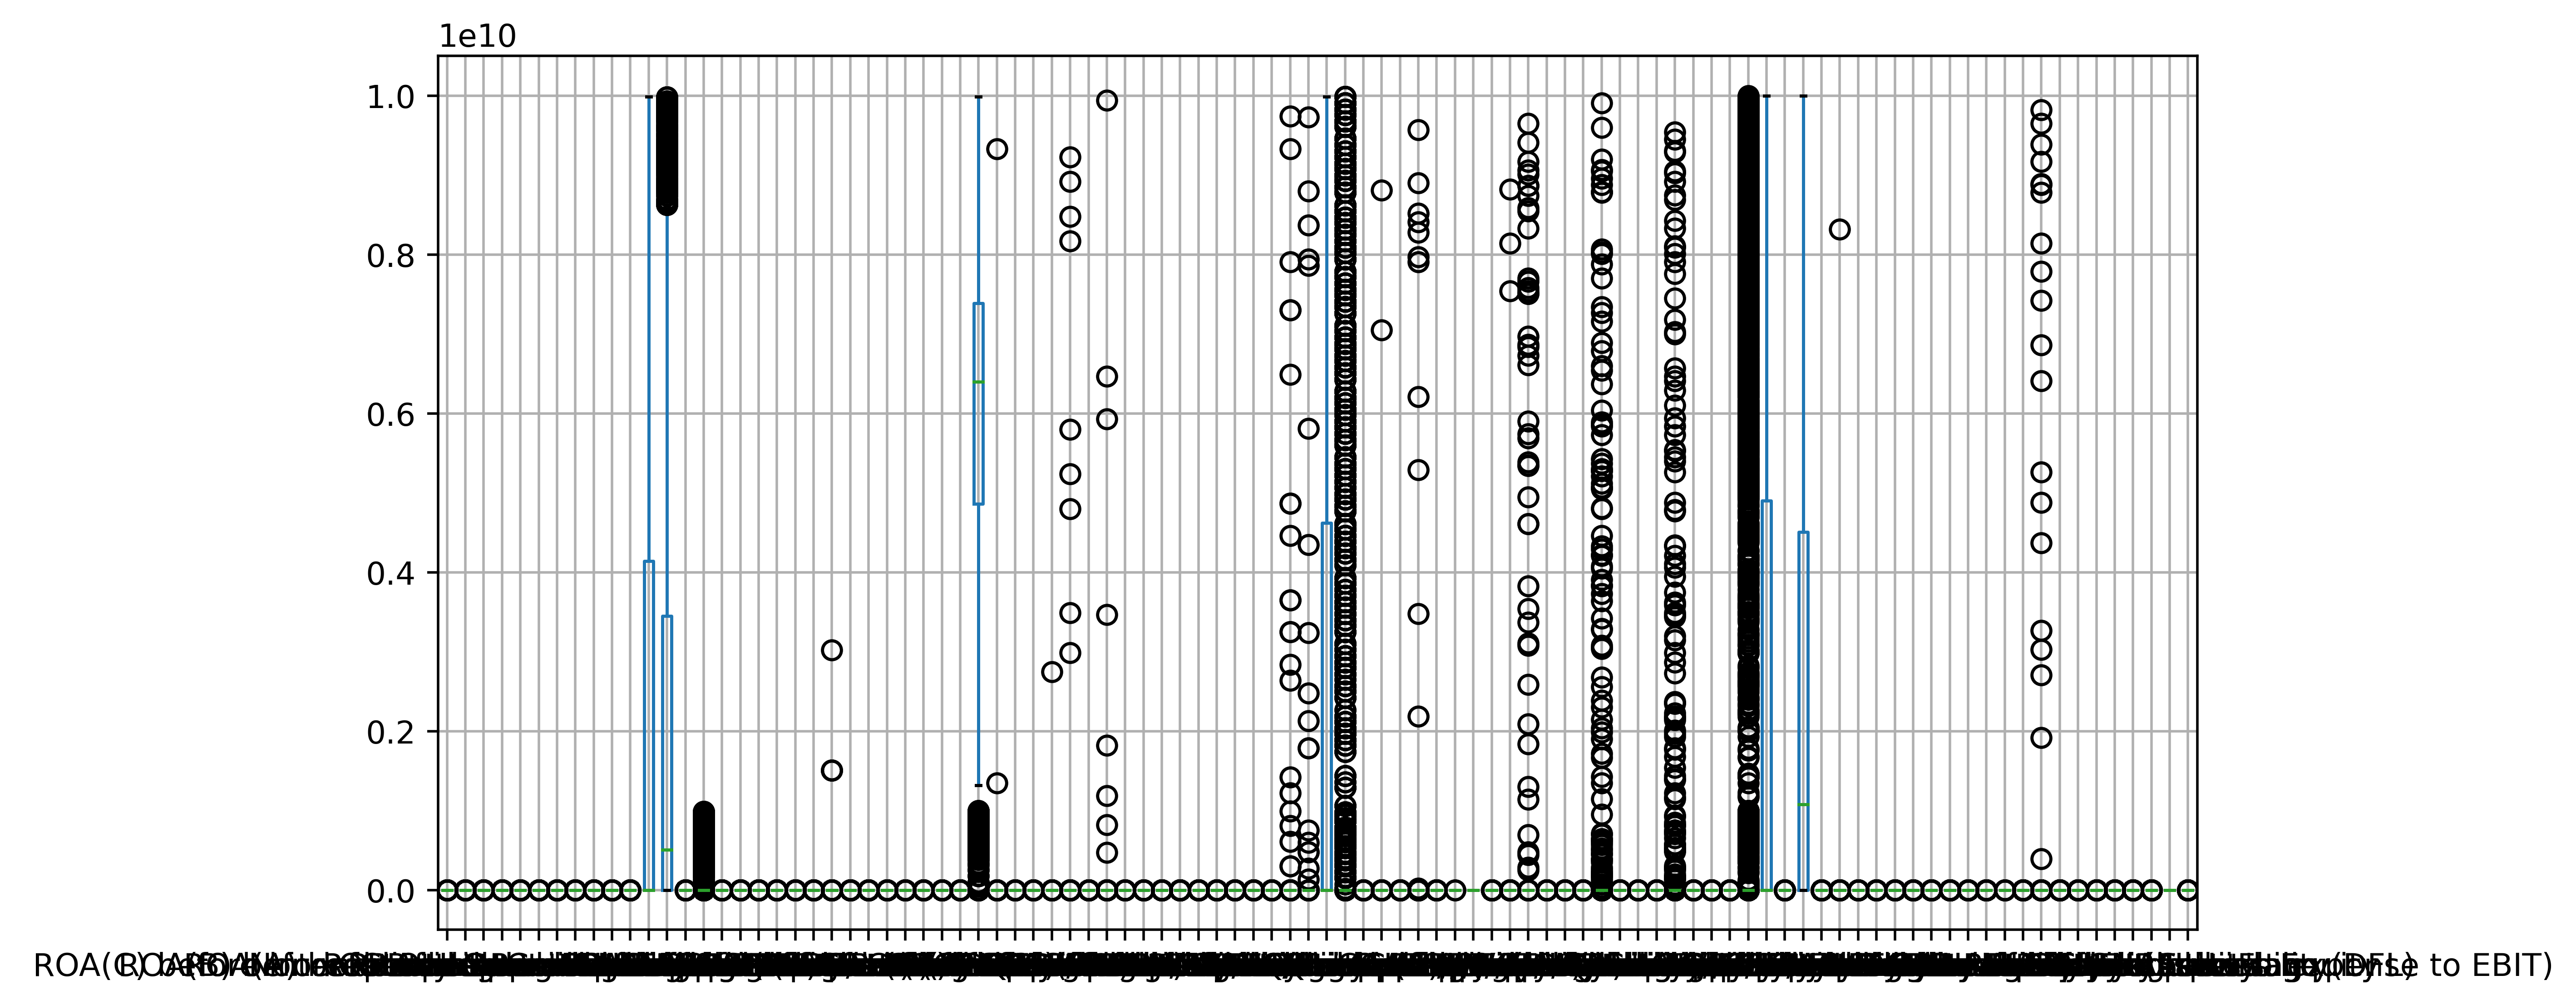

In [9]:
#Searching for outliers if there are any
df.boxplot()

In [10]:
# Dividing target column and independet column into y and x
# x as all the independent column
# y as our target column

x = df.drop(columns="Bankrupt?")
y = df["Bankrupt?"]

In [11]:
#Independent column
x

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.

In [12]:
#Target column
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [13]:
# As there are many outliers present in our dataset we need fill the gap
def outlier_detection(data, cols):
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)

        iqr = q3 - q1

        lower = q1 - (1.5 * iqr)
        upper = q3 + (1.5 * iqr)

        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

In [14]:
outlier_detection(df,x.columns)

<Axes: >

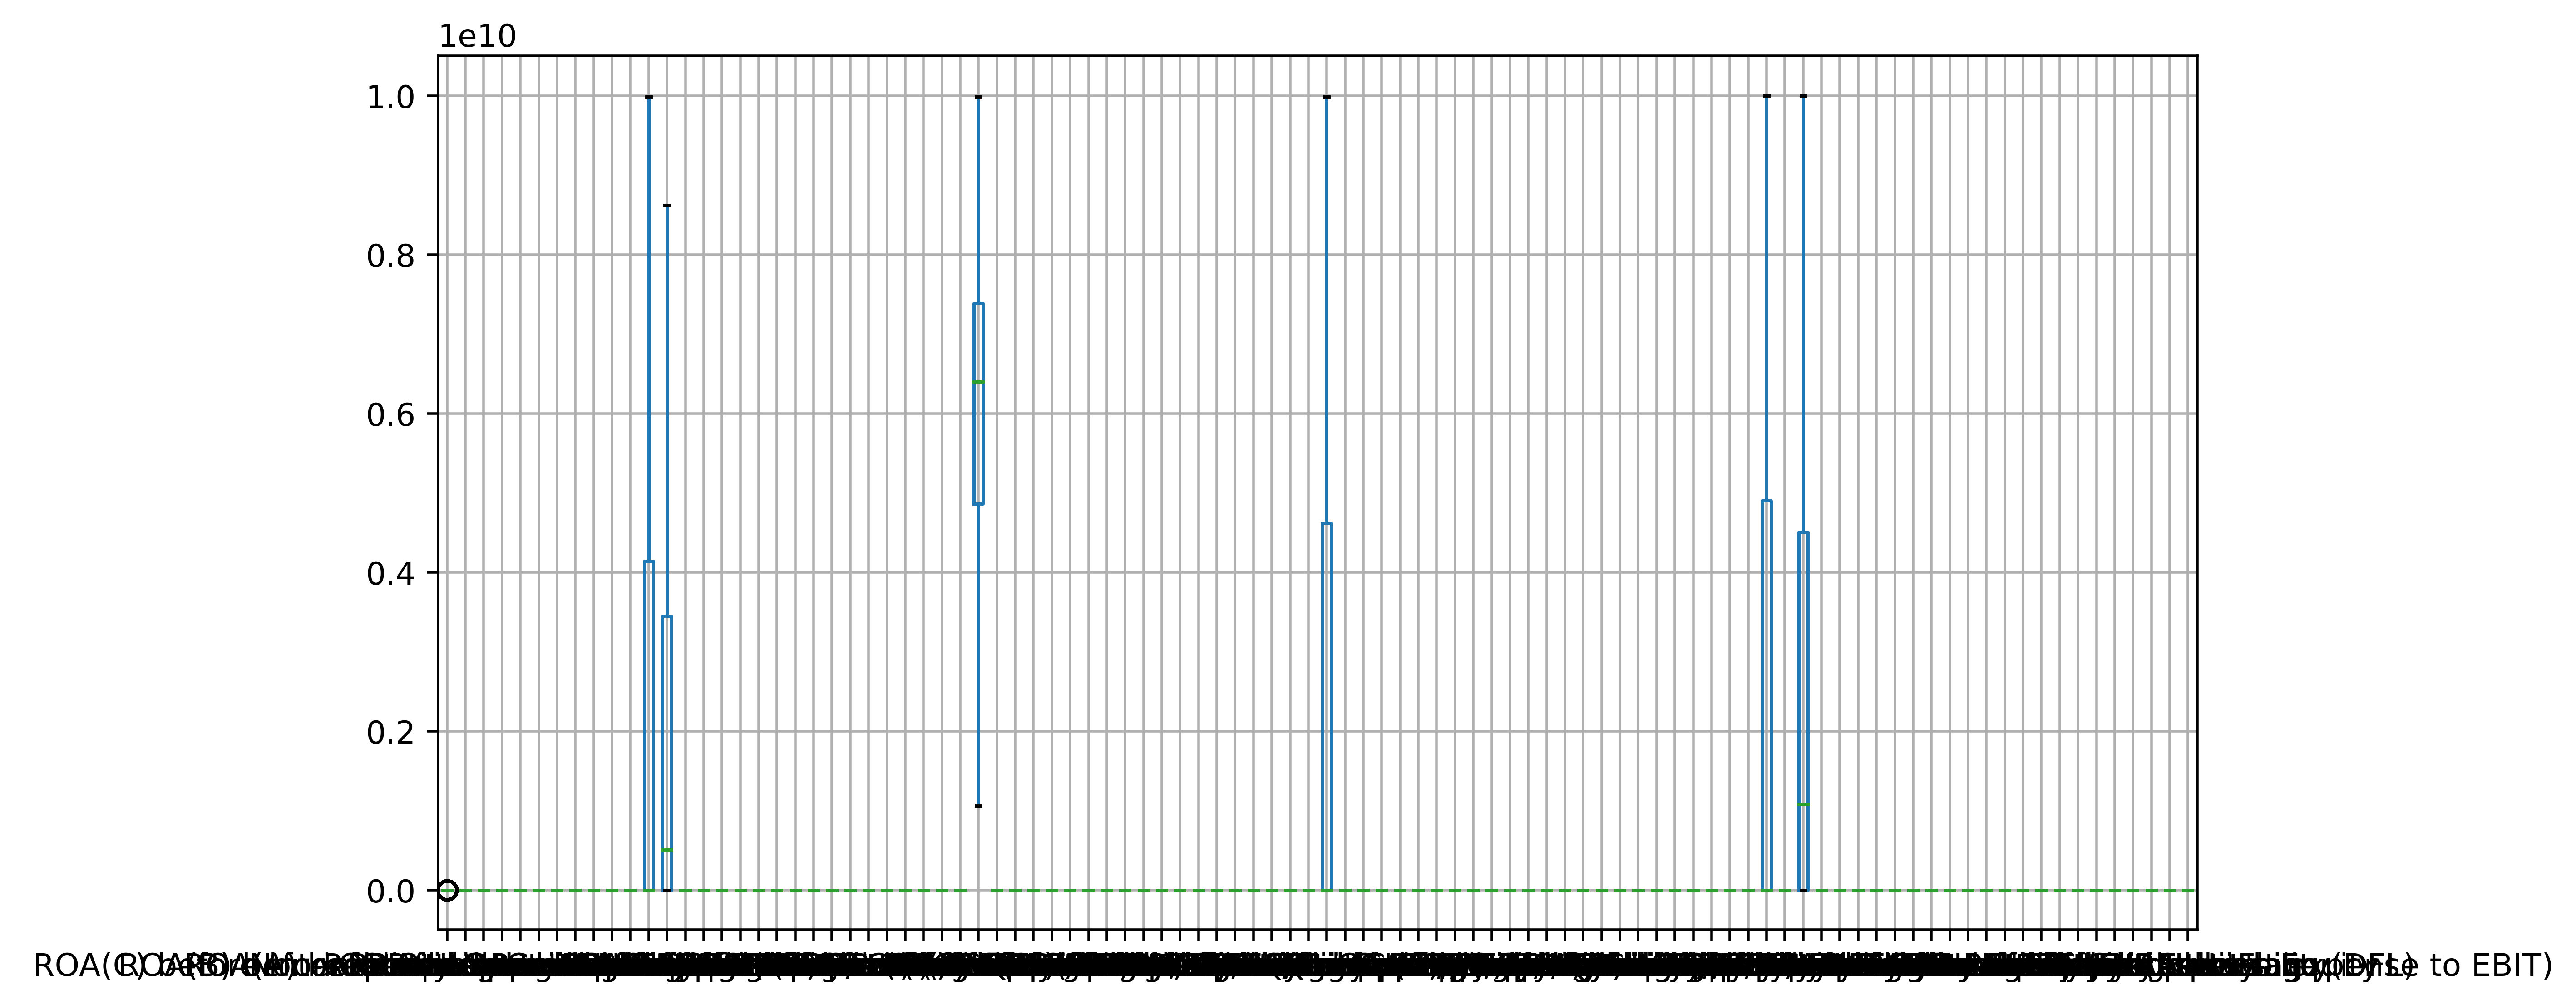

In [15]:
#All outliers are removed
df.boxplot()

In [16]:
df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Text(0.5, 1.0, 'Bankrupt')

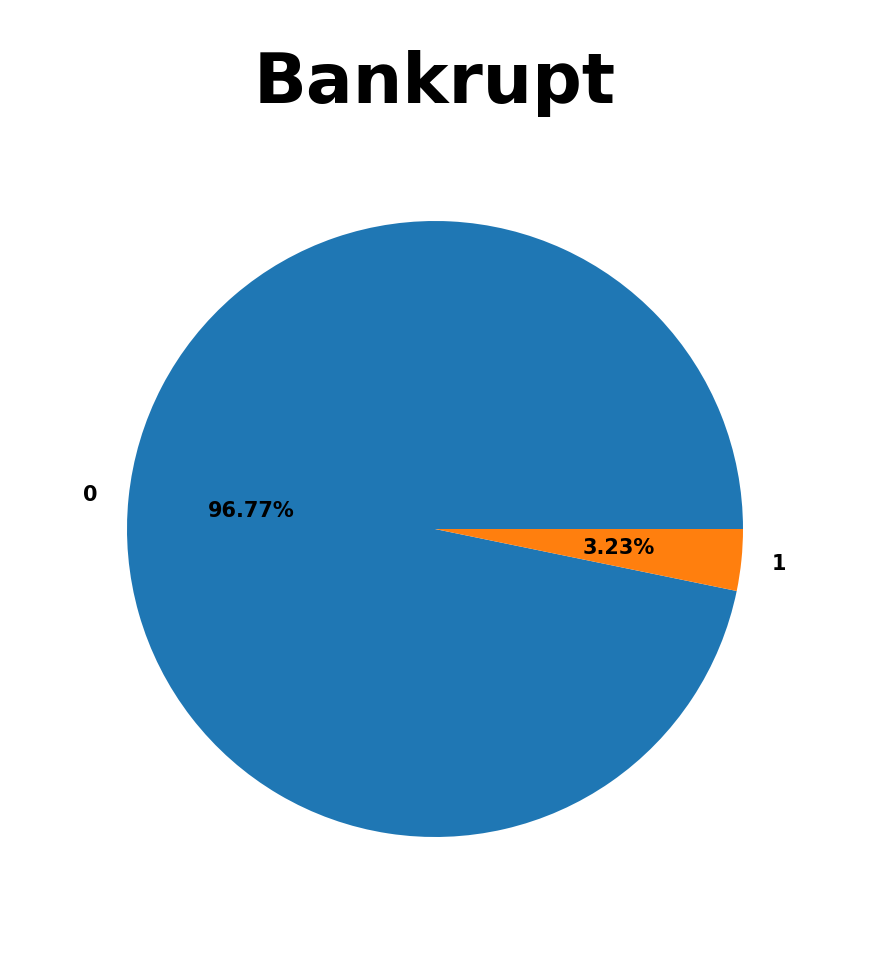

In [17]:
# Pie chart for our target column bankrupt
plt.figure(figsize=(5,2))
plt.pie(df["Bankrupt?"].value_counts(),
        labels=df["Bankrupt?"].value_counts().index,
        autopct= '%.2f%%',
        textprops = {'size' : 3, 'fontweight': 'bold'})

plt.title("Bankrupt", fontsize = 10, fontweight = "bold")

Text(0.5, 1.0, 'Barplot for Bankrupt')

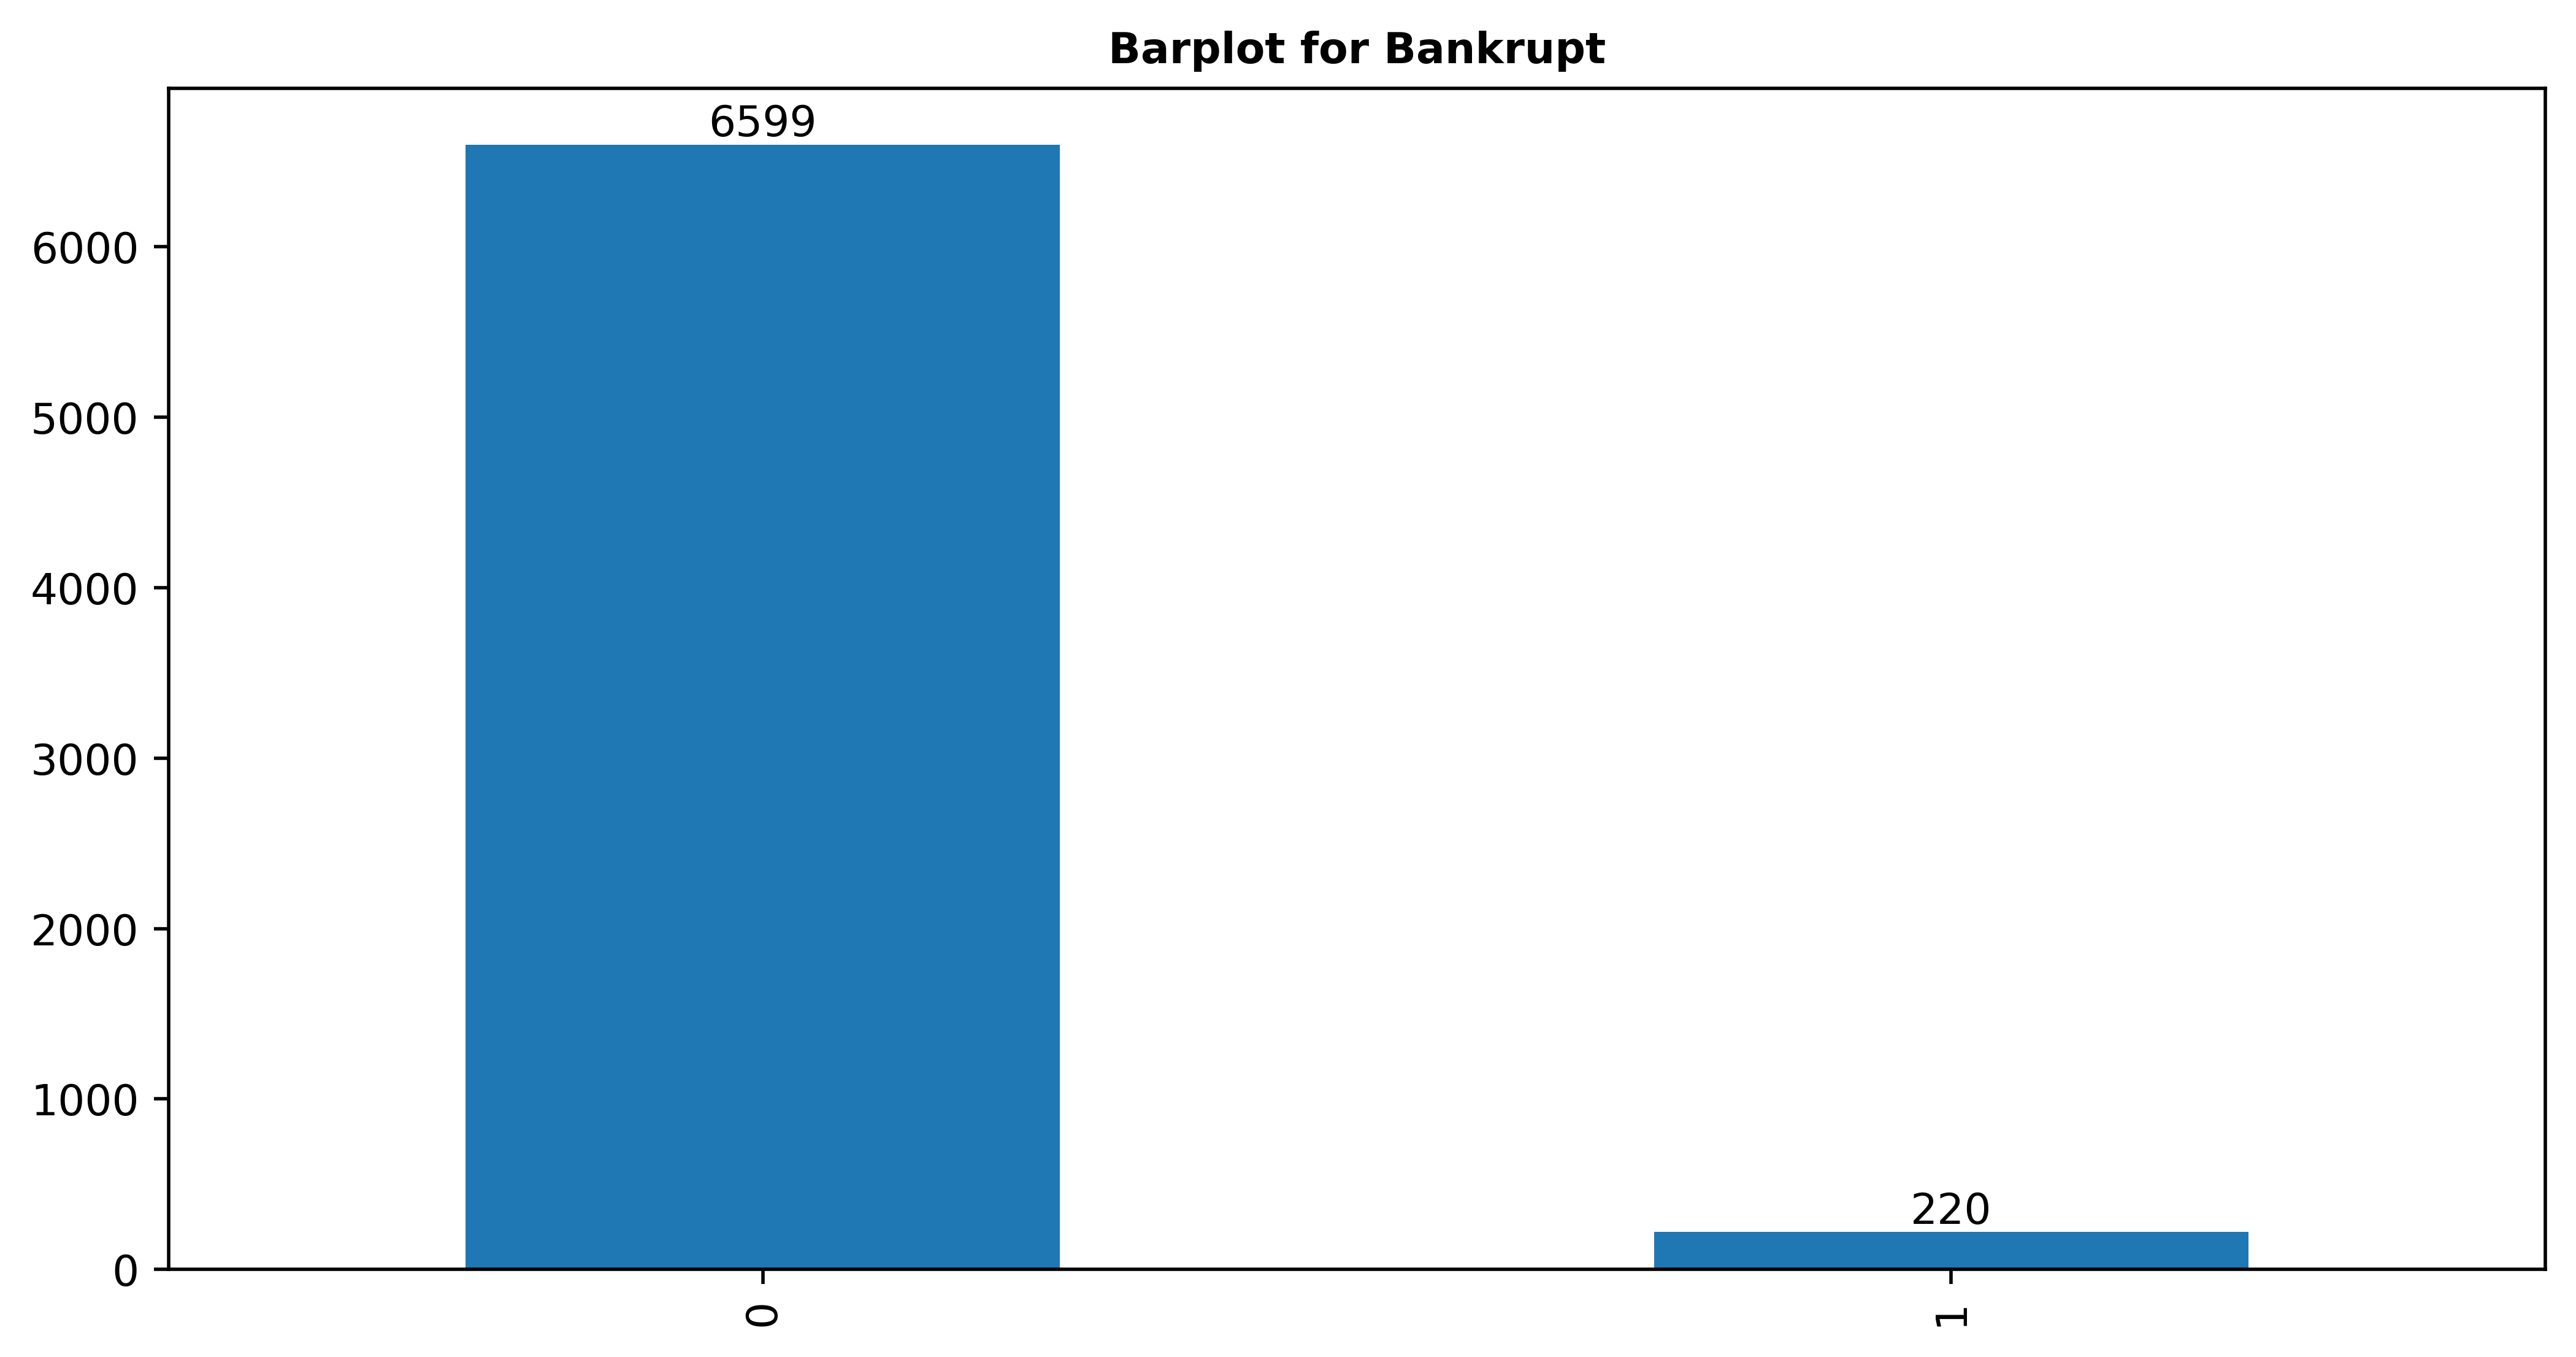

In [18]:
#Barplot for Bankrupt
barplot = df["Bankrupt?"].value_counts().plot(kind = 'bar')

for i in barplot.containers:
    barplot.bar_label(i)

plt.title("Barplot for Bankrupt", fontsize = 10, fontweight = "bold")

# Feature Selection

In [19]:
from sklearn.feature_selection import SelectKBest, chi2 ,f_classif, RFE,mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import rfecv
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Recursive Feature Elimination usign Logestic regression:

In [20]:
rfe = RFE(LogisticRegression())
rfe.fit(x,y)

RFE(estimator=LogisticRegression())

In [21]:
rfe.ranking_

array([ 6,  1,  1,  2,  4,  1,  1,  1, 21,  1,  1,  1, 11,  1, 34, 30, 28,
       29, 24, 17,  1, 35, 27, 43,  1,  1,  1, 32,  1,  1, 26, 14,  1,  1,
        1,  1, 41,  1, 46, 16, 48, 36, 31, 13, 33,  1,  1,  1,  1, 39,  1,
       12,  1,  1,  8,  1, 22,  1,  1, 40, 15, 23,  1,  1,  1, 20,  1,  1,
       47, 45,  1,  1,  7,  1,  1,  1,  1, 19, 37,  1, 10,  5, 18, 49, 44,
        1,  1,  1,  3,  1, 25, 42,  9,  1, 38])

In [22]:
rfe.get_feature_names_out()

array([' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate',
       ' Interest-bearing debt interest rate',
       ' Revenue Per Share (Yuan ¥)', ' Operating Profit Growth Rate',
       ' After-tax Net Profit Growth Rate',
       ' Regular Net Profit Growth Rate', ' Total Asset Growth Rate',
       ' Net Value Growth Rate', ' Current Ratio', ' Quick Ratio',
       ' Interest Expense Ratio', ' Total debt/Total net worth',
       ' Net worth/Assets', ' Accounts Receivable Turnover',
       ' Average Collection Days', ' Inventory Turnover Rate (times)',
       ' Fixed Assets Turnover Frequency', ' Revenue per person',
       ' Allocation rate per person', ' Working Capital to Total Assets',
       ' Current Assets/Tot

In [23]:
rfe1={"column":x.columns,"Ranks":rfe.ranking_}
rfedf=pd.DataFrame(rfe1)
rfedf.sort_values("Ranks")

,column,Ranks
47,Inventory Turnover Rate (times),1
71,Quick Asset Turnover Rate,1
28,Total Asset Growth Rate,1
29,Net Value Growth Rate,1
70,Current Asset Turnover Rate,1
...,...,...
69,Total expense/Assets,45
38,Long-term fund suitability ratio (A),46
68,Total income/Total expense,47
40,Contingent liabilities/Net worth,48


In [24]:
rfedf[rfedf["Ranks"] < 10]

,column,Ranks
0,ROA(C) before interest and depreciation befor...,6
1,ROA(A) before interest and % after tax,1
2,ROA(B) before interest and depreciation after...,1
3,Operating Gross Margin,2
4,Realized Sales Gross Margin,4
5,Operating Profit Rate,1
6,Pre-tax net Interest Rate,1
7,After-tax net Interest Rate,1
9,Continuous interest rate (after tax),1
10,Operating Expense Rate,1


# Tree Based Method

In [25]:
dt = DecisionTreeClassifier()

dt.fit(x,y)

DecisionTreeClassifier()

In [26]:
dt.feature_importances_

array([0.        , 0.00552833, 0.04849089, 0.        , 0.00443605,
       0.        , 0.        , 0.0108483 , 0.02376648, 0.00375759,
       0.02717792, 0.00023879, 0.        , 0.05153723, 0.00220616,
       0.00313133, 0.        , 0.01518577, 0.01120833, 0.        ,
       0.00782832, 0.01032681, 0.        , 0.02183506, 0.01983627,
       0.00527499, 0.00436149, 0.00506289, 0.00215747, 0.17682781,
       0.01998088, 0.01283384, 0.01316705, 0.02602286, 0.01510332,
       0.00114755, 0.00763261, 0.00426999, 0.00470353, 0.05409084,
       0.        , 0.01317898, 0.        , 0.00413862, 0.00754128,
       0.01579638, 0.        , 0.01143737, 0.03410102, 0.        ,
       0.00518446, 0.01689171, 0.0285697 , 0.00402599, 0.00869375,
       0.00153723, 0.04728711, 0.0023485 , 0.00090754, 0.00431968,
       0.00107555, 0.00897902, 0.01670042, 0.        , 0.00577714,
       0.        , 0.00313133, 0.01232961, 0.00563639, 0.01259247,
       0.00770096, 0.00112951, 0.        , 0.00282896, 0.     

In [27]:
dt={"column":x.columns,"Imp":dt.feature_importances_}
dtdf=pd.DataFrame(dt)
dtdf.sort_values("Imp",ascending=False)

,column,Imp
29,Net Value Growth Rate,0.176828
39,Borrowing dependency,0.054091
13,Interest-bearing debt interest rate,0.051537
2,ROA(B) before interest and depreciation after...,0.048491
56,Cash/Total Assets,0.047287
...,...,...
42,Net profit before tax/Paid-in capital,0.000000
63,Current Liabilities/Liability,0.000000
46,Average Collection Days,0.000000
49,Net Worth Turnover Rate (times),0.000000


In [28]:
dtdf[dtdf["Imp"] > 0.01]

,column,Imp
2,ROA(B) before interest and depreciation after...,0.048491
7,After-tax net Interest Rate,0.010848
8,Non-industry income and expenditure/revenue,0.023766
10,Operating Expense Rate,0.027178
13,Interest-bearing debt interest rate,0.051537
17,Net Value Per Share (C),0.015186
18,Persistent EPS in the Last Four Seasons,0.011208
21,Operating Profit Per Share (Yuan ¥),0.010327
23,Realized Sales Gross Profit Growth Rate,0.021835
24,Operating Profit Growth Rate,0.019836


# Univariate Selection


In [29]:
#chi2
test  = SelectKBest(score_func=chi2,k=10)
test_fit=test.fit(x,y)
d={"column":x.columns,"scores":test_fit.scores_}
chi2=pd.DataFrame(d)
chi2.sort_values("scores",ascending=False)

,column,scores
58,Cash/Current Liability,2.901545e+11
75,Fixed Assets to Assets,2.495621e+11
29,Net Value Growth Rate,2.421293e+11
48,Fixed Assets Turnover Frequency,2.200229e+11
50,Revenue per person,8.633138e+10
...,...,...
23,Realized Sales Gross Profit Growth Rate,9.328172e-06
72,Working capitcal Turnover Rate,7.718998e-06
74,Cash Flow to Sales,2.030631e-07
5,Operating Profit Rate,6.102672e-08


In [30]:
print(x.columns[test.get_support()])

Index([' Research and development expense rate', ' Total Asset Growth Rate',
       ' Net Value Growth Rate', ' Quick Ratio',
       ' Fixed Assets Turnover Frequency', ' Revenue per person',
       ' Cash/Current Liability', ' Quick Asset Turnover Rate',
       ' Fixed Assets to Assets', ' Total assets to GNP price'],
      dtype='object')


In [31]:
#Anova
test1 = SelectKBest(score_func=f_classif,k=10)
test1_fit=test1.fit(x,y)
df1={"column":x.columns,"scores":test_fit.scores_}
anova=pd.DataFrame(d)
anova.sort_values("scores",ascending=False)

,column,scores
58,Cash/Current Liability,2.901545e+11
75,Fixed Assets to Assets,2.495621e+11
29,Net Value Growth Rate,2.421293e+11
48,Fixed Assets Turnover Frequency,2.200229e+11
50,Revenue per person,8.633138e+10
...,...,...
23,Realized Sales Gross Profit Growth Rate,9.328172e-06
72,Working capitcal Turnover Rate,7.718998e-06
74,Cash Flow to Sales,2.030631e-07
5,Operating Profit Rate,6.102672e-08


In [32]:
test1.get_feature_names_out()

array([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Net profit before tax/Paid-in capital',
       ' Retained Earnings to Total Assets',
       ' Net Income to Total Assets'], dtype=object)

In [33]:
xfinal = df[test1.get_feature_names_out()]

In [34]:
# Final Independent columns
xfinal

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Net profit before tax/Paid-in capital,Retained Earnings to Total Assets,Net Income to Total Assets
0,0.387973,0.455122,0.442034,0.178548,0.138736,0.207576,0.792424,0.137757,0.910524,0.752193
1,0.464291,0.538214,0.516730,0.208944,0.169918,0.171176,0.828824,0.168962,0.931065,0.795297
2,0.426071,0.499019,0.472295,0.180581,0.142803,0.207516,0.792484,0.148036,0.910524,0.774670
3,0.399844,0.455122,0.457733,0.193722,0.148603,0.151465,0.848535,0.147561,0.910524,0.752193
4,0.465022,0.538432,0.522298,0.212537,0.168412,0.106509,0.893491,0.167461,0.913850,0.795016
...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.216602,0.172102,0.124618,0.875382,0.171111,0.925611,0.799927
6815,0.475162,0.538269,0.524172,0.216697,0.172780,0.099253,0.900747,0.171805,0.932629,0.799748
6816,0.472725,0.533744,0.520638,0.210929,0.173232,0.038939,0.961061,0.172287,0.932000,0.797778
6817,0.506264,0.559911,0.554045,0.228326,0.185584,0.086979,0.913021,0.182498,0.939613,0.811808


# Balancing target labels

In [35]:
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

In [36]:
smote = BorderlineSMOTE()
xfinal, y = smote.fit_resample(xfinal, y)

In [37]:
print("Final dimensions of target label classes:", Counter(y))

Final dimensions of target label classes: Counter({1: 6599, 0: 6599})


In [38]:
xfinal.shape

(13198, 10)

Text(0.5, 1.0, 'Barplot for Bankrupt')

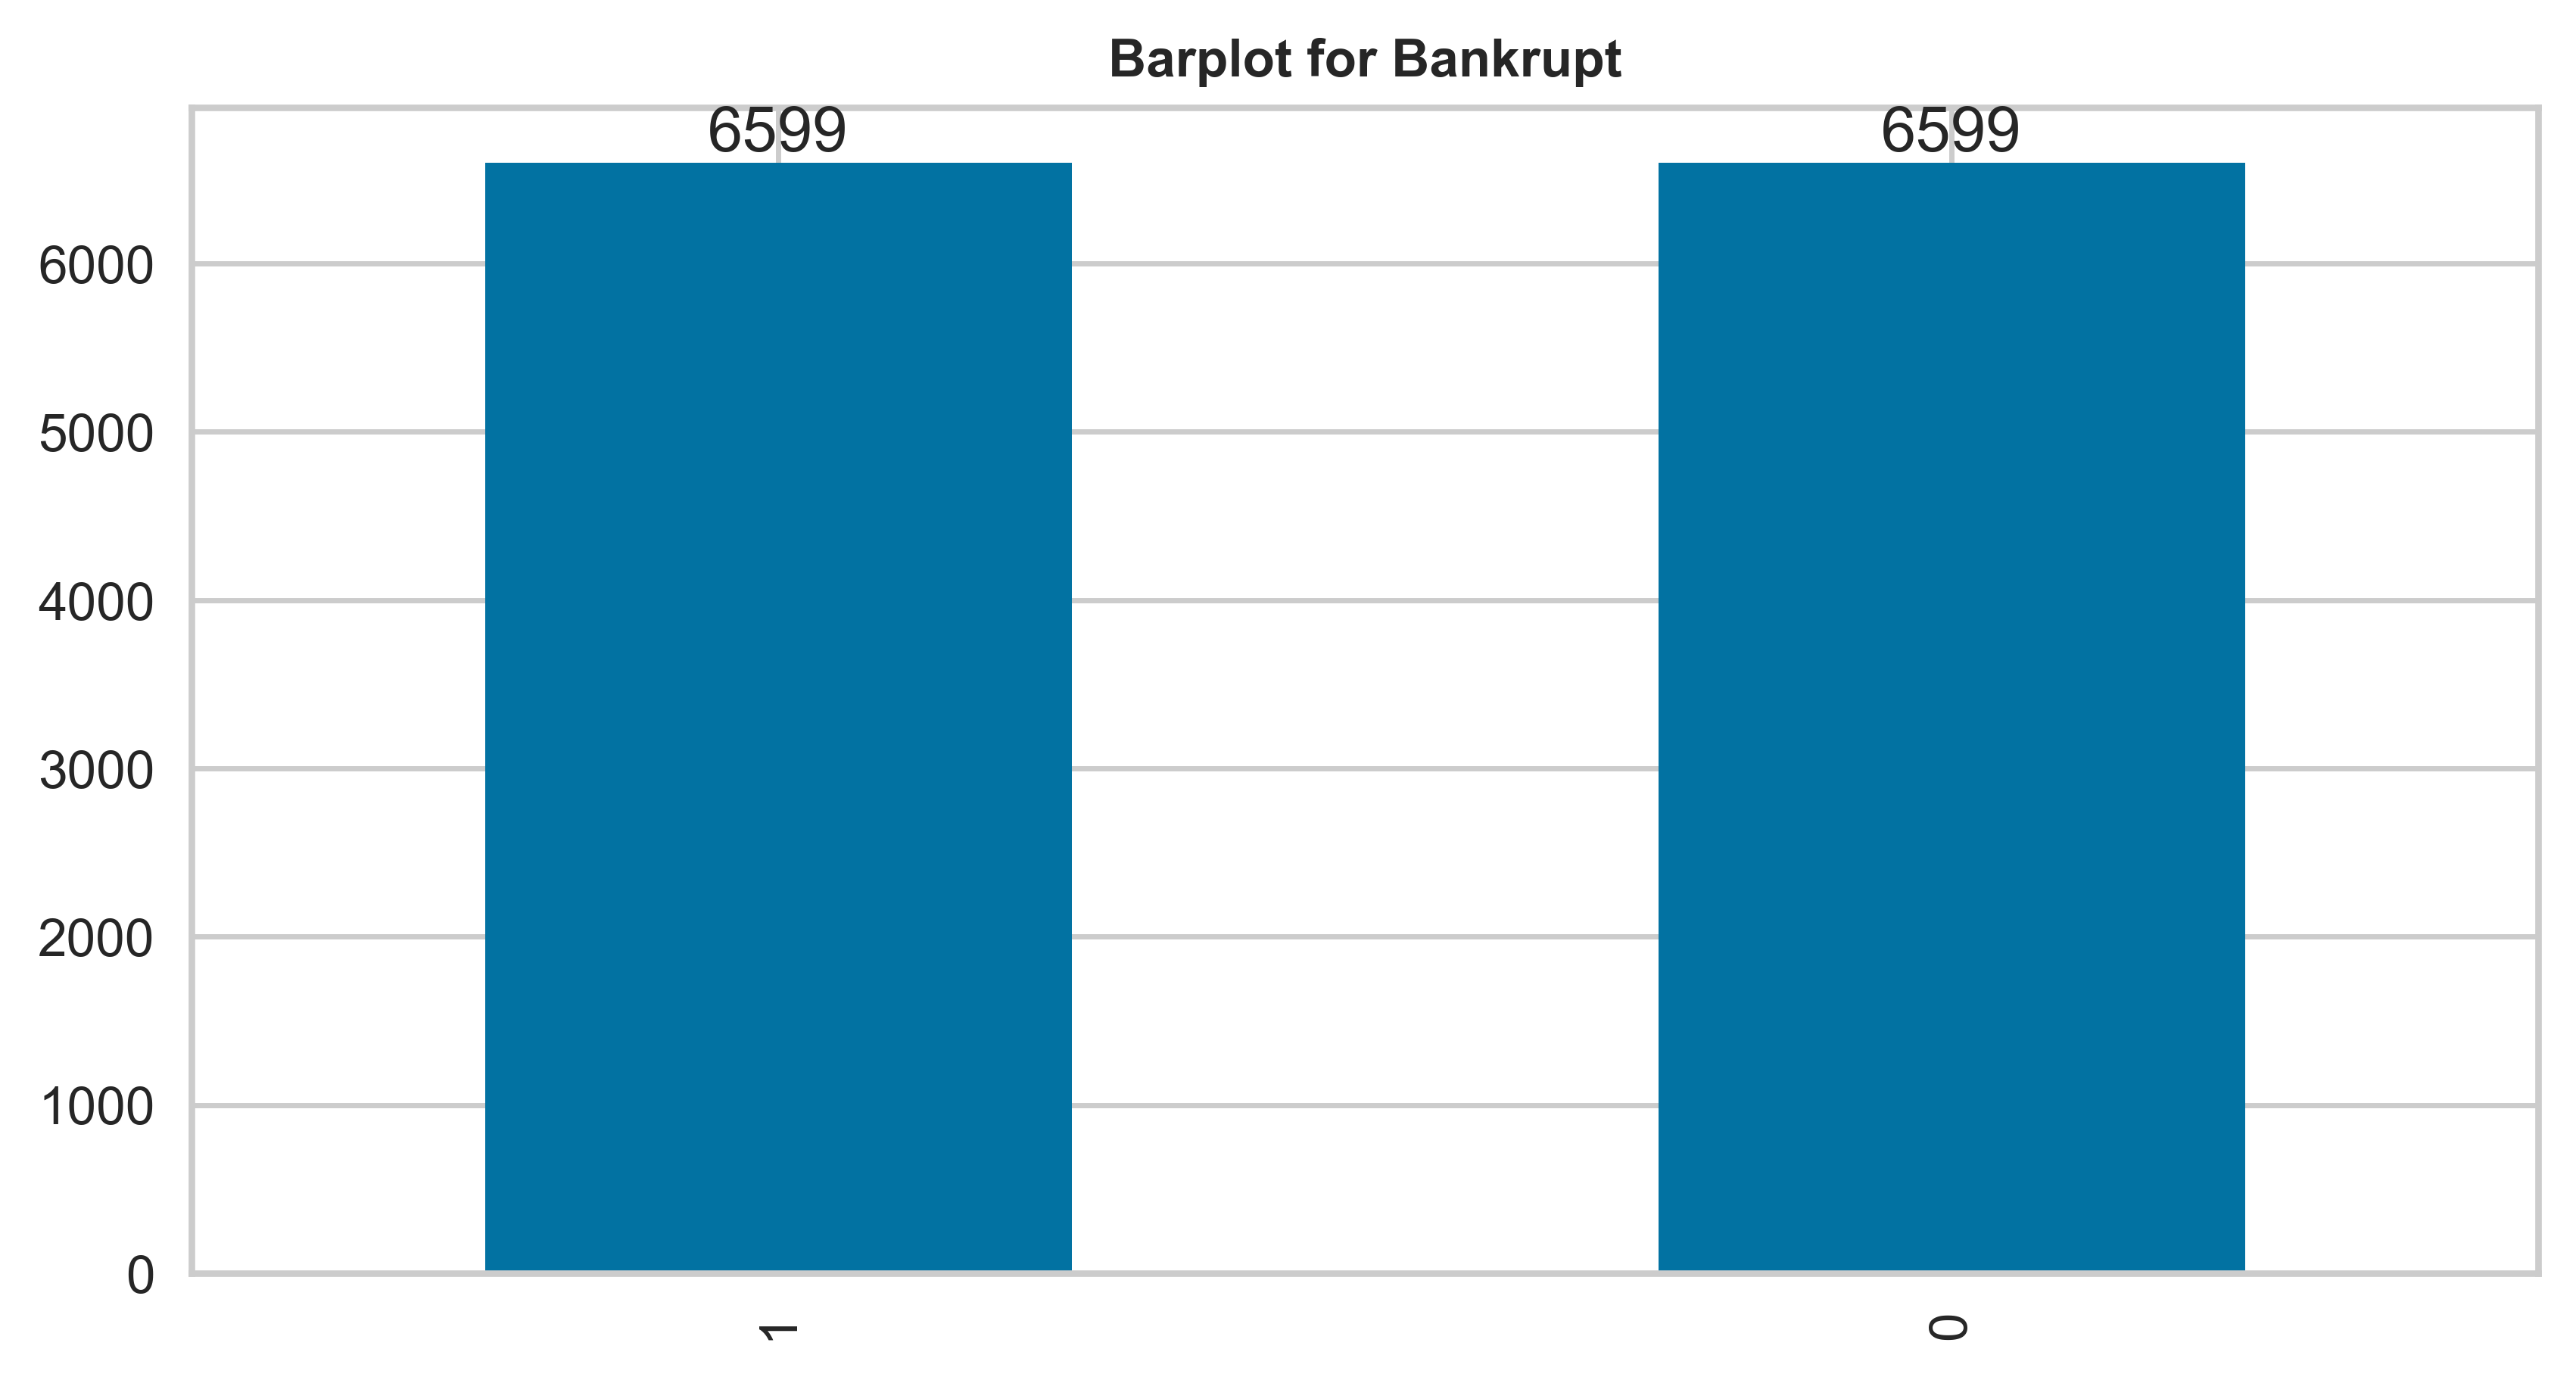

In [39]:
#Barplot for Bankrupt
plt.figure(figsize=(8,4))
barplot = y.value_counts().plot(kind = 'bar')

for i in barplot.containers:
    barplot.bar_label(i)

plt.title("Barplot for Bankrupt", fontsize = 10, fontweight = "bold")

Text(0.5, 1.0, 'Bankrupt')

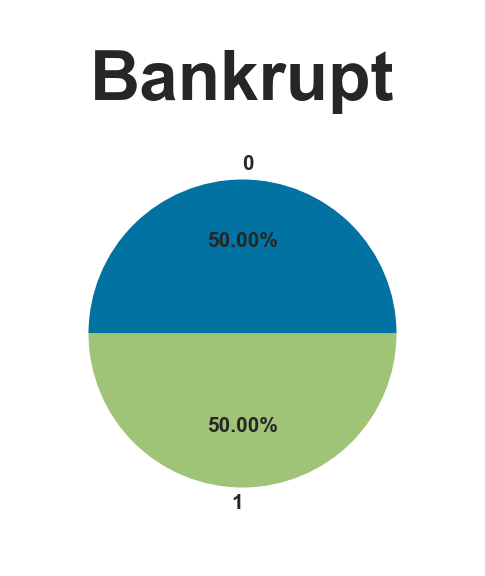

In [40]:
plt.figure(figsize=(3,1))
plt.pie(y.value_counts(),
        labels=df["Bankrupt?"].value_counts().index,
        autopct= '%.2f%%',
        textprops = {'size' : 3, 'fontweight': 'bold'})

plt.title("Bankrupt", fontsize = 10, fontweight = "bold")

# Model Building

In [41]:
#Diving the data into training data and test data
xtrain, xtest, ytrain, ytest = train_test_split(xfinal, y, test_size=0.3,random_state=42)

In [42]:
#Function for all the model
def prediction(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,ypred))

# Decision Tree

In [43]:
prediction(DecisionTreeClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2005
           1       0.95      0.98      0.97      1955

    accuracy                           0.97      3960
   macro avg       0.97      0.97      0.97      3960
weighted avg       0.97      0.97      0.97      3960



# Random Forest


In [44]:
prediction(RandomForestClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.9785353535353535
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2005
           1       0.96      0.99      0.98      1955

    accuracy                           0.98      3960
   macro avg       0.98      0.98      0.98      3960
weighted avg       0.98      0.98      0.98      3960



# Ensemble Techniques (Bagging)

In [45]:
prediction(BaggingClassifier())

Train Accuracy: 0.9983762719203291
Test Accuracy: 0.976010101010101
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2005
           1       0.97      0.99      0.98      1955

    accuracy                           0.98      3960
   macro avg       0.98      0.98      0.98      3960
weighted avg       0.98      0.98      0.98      3960



# Ensemble Technique (XGBoost)

In [46]:
prediction(XGBClassifier())

Train Accuracy: 0.9970772894565924
Test Accuracy: 0.9792929292929293
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2005
           1       0.96      0.99      0.98      1955

    accuracy                           0.98      3960
   macro avg       0.98      0.98      0.98      3960
weighted avg       0.98      0.98      0.98      3960



# Ensemble Technique (Gradient Boosting)

In [47]:
prediction(GradientBoostingClassifier())

Train Accuracy: 0.9628707512448582
Test Accuracy: 0.9601010101010101
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2005
           1       0.93      0.99      0.96      1955

    accuracy                           0.96      3960
   macro avg       0.96      0.96      0.96      3960
weighted avg       0.96      0.96      0.96      3960



# Support Vector Machine

In [48]:
prediction(SVC())

Train Accuracy: 0.9077722450746915
Test Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

           0       0.95      0.86      0.91      2005
           1       0.87      0.95      0.91      1955

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



# K nearest Neighbour

In [49]:
prediction(KNeighborsClassifier())

Train Accuracy: 0.9675254384065816
Test Accuracy: 0.9636363636363636
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2005
           1       0.93      1.00      0.96      1955

    accuracy                           0.96      3960
   macro avg       0.97      0.96      0.96      3960
weighted avg       0.97      0.96      0.96      3960



# Pickle file

In [50]:
import pickle

In [53]:
with open('xgb_model_top_10_features.pkl', 'wb') as model_file:
    pickle.dump(XGBClassifier, model_file)